# OBJECTIVE:

The dataset has been taken from Kaggle and there are 17379 rows and 16 columns.

The goal is to predict the count of the bikes rented with the help of the attributes such as temperature, windspeed, humidity, etc.

The dataset is of Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto, Portugal. 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic.

Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. 

There exists great interest in these systems due to their important role in traffic, environmental and health issues. All the data are recorded regarding this bike rental service and thus this feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

Steps used:
1. Missing Value Detection, Outlier Removal

2. EDA

3. Correlation heatmap

4. Feature Engineering, One-hot encoding and multivariate regression


In [ ]:
#importing google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [ ]:
#data is stored in df_hour
df_hour=pd.read_csv("/content/drive/MyDrive/hour.csv",parse_dates=['dteday'])
df_hour.set_index('instant',inplace=True)

In [ ]:
#".head()" method will show the first 5 rows of the dataframe
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#summary of the data
df_hour.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#The ".shape" attribute returns the overall shape of the data 
df_hour.shape

(17379, 16)

In [ ]:
#checking the datatypes of columns
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

# Exploring the data using Visualizations 

{'boxes': [<matplotlib.lines.Line2D at 0x7f1df2c01990>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1df2c06a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1df2c0cad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1df2c0c590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1df2c01fd0>,
  <matplotlib.lines.Line2D at 0x7f1df2c06550>]}

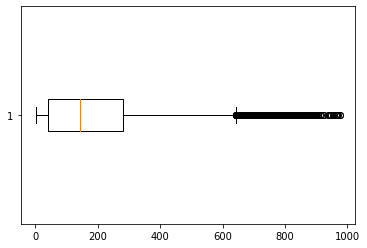

In [ ]:
plt.boxplot(df_hour.cnt,vert=False) #boxplot of the data

The distribution of the count variable is positively skewed with many outliers.

OUTLIER REMOVAL

In [ ]:
#function to remove outliers
def outlier_removal(dataframe, dataframe2, limit = 1.5):
        
    for col in dataframe2:           # This is for the variables to be treated from upper right whisker
        rw = limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)) + dataframe[col].quantile(0.75)
        lw = dataframe[col].quantile(0.25)-(limit*(dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)))
        dataframe = dataframe[~(dataframe[col]>rw)]
        dataframe = dataframe[~(dataframe[col]<lw)]
        dataframe = dataframe   
    
    return dataframe

In [ ]:
col=['cnt']
df_hour= outlier_removal(df_hour,df_hour[col], limit = 1.5) #calling the function

In [ ]:
df_hour.shape

(16874, 16)

{'boxes': [<matplotlib.lines.Line2D at 0x7f1df2bead90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1df2b71e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1df2b78e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1df2b78910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1df2b71390>,
  <matplotlib.lines.Line2D at 0x7f1df2b718d0>]}

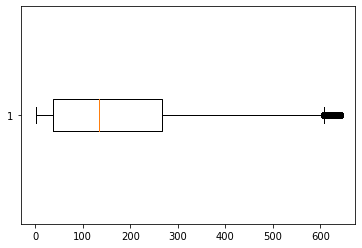

In [ ]:
plt.boxplot(df_hour.cnt,vert=False) #boxplot of the data

NOTE: Outliers got removed.

In [ ]:
#The season numbers are replaced by their respective names and stored in another column
df_hour['season_name']=df_hour['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
df_hour.drop('season',axis=1,inplace=True)

In [ ]:
#summary of the count of bikes rented grouped across seasons
df_hour.groupby('season_name')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
season_name,,,,,,,,
Fall,4298.0,211.527687,164.155127,1.0,60.0,188.0,321.00,641.0
Spring,4223.0,108.410609,112.405701,1.0,23.0,75.0,157.00,623.0
Summer,4253.0,189.459440,162.905098,1.0,42.0,156.0,291.00,642.0
Winter,4100.0,180.872195,154.705937,1.0,44.0,149.5,274.25,642.0


NOTE: The mean number of bikes are maximum for the Fall season.

# MISSING VALUES DETECTION

In [ ]:
df_hour.isnull().sum()

dteday         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
season_name    0
dtype: int64

There are no missing values in the columns. 

In [ ]:
# 0: 2011, 1: 2012
df_hour.groupby('yr')['cnt'].mean()

yr
0    143.735770
1    203.142041
Name: cnt, dtype: float64

NOTE: The mean bikes rented for the year 2012 is much higher than the previous year.

<BarContainer object of 4 artists>

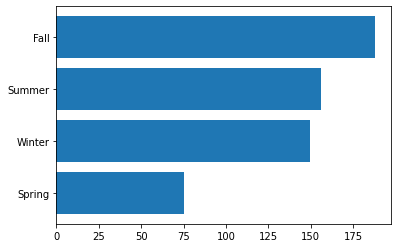

In [ ]:
#There are many outliers in the data, hence median values are considered
s2=df_hour.groupby('season_name')['cnt'].median().sort_values()
plt.barh(s2.index,s2)

NOTE: The Fall season has maximum number of bikes rented in terms of median values.

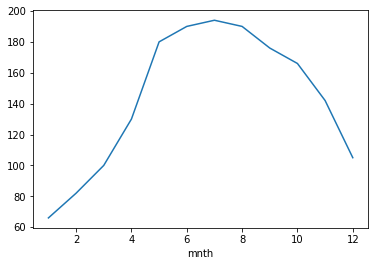

In [ ]:
#Plot of count vs months
df_hour.groupby('mnth')['cnt'].median().plot()

NOTE: The maximum bikes were rented in the months of May-October.

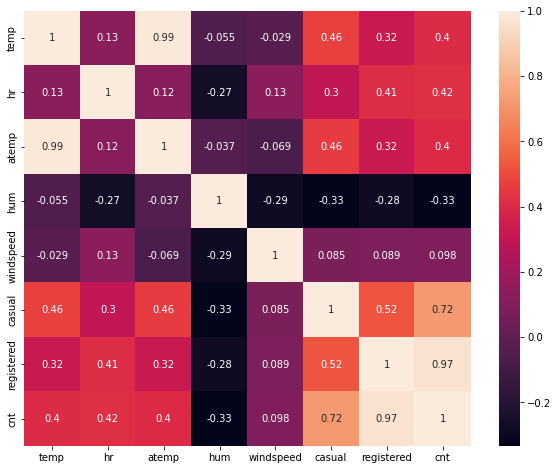

In [ ]:
#Correlation of the variables are plotted in form of a heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(df_hour[['temp','hr','atemp','hum','windspeed','casual','registered','cnt']].corr(),annot=True)

NOTES:

1. temp and atemp are very highly correlated (significant p value) and hence one of them should be dropped to prevent the multicollinearity. We will drop atemp which is the feel temperature and keep temp in our dataset.

2. temp and cnt have correlation of 0.4 (significant p value) and since here, our objective is to predict the count of bike rents, temp can be considered as an important predictor variable.

3. Humidity is very weakly correlated with the other variables and hence, we can keep it. It is also negatively correlated with cnt. It might not be a very good predictor in bivariate regression to predict cnt.

4. Similarly windspeed is weakly associated with cnt and may not be that good a predictor but still slightly better than humidity.

5. Registered and casual bike rents are added to get the cnt column and they are showing more or less similar behavior with the other features and are highly correlated with cnt. Hence, we will drop casual and registered and work with only cnt.

6. Moderate Positive association between hour and count.


We perform a hypothesis test of the “significance of the correlation coefficient” to decide whether the linear relationship in the sample data is strong enough to use to model the relationship in the population.

If p value<0.05 -> There is a significant linear relationship between x and y.

In [ ]:
#To check the p values of the correlation
r,p=stats.pearsonr(df_hour['temp'],df_hour['cnt'])
print(r,p)

0.4015785818911404 0.0


In [ ]:
r,p=stats.pearsonr(df_hour['hum'],df_hour['cnt'])
print(r,p)


-0.3269726285500816 0.0


In [ ]:
r,p=stats.pearsonr(df_hour['windspeed'],df_hour['cnt'])
print(r,p)

0.09780063465147744 3.832438608054255e-37


In [ ]:
r,p=stats.pearsonr(df_hour['temp'],df_hour['atemp'])
print(r,p)

0.9882761993584442 0.0


In [ ]:
r,p=stats.pearsonr(df_hour['hum'],df_hour['windspeed'])
print(r,p)

-0.2888883586607845 1.126e-321


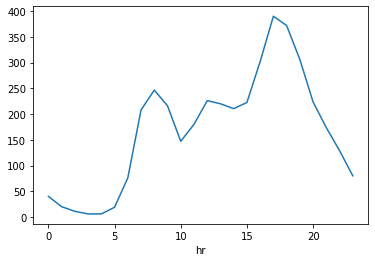

In [ ]:
df_hour.groupby('hr')['cnt'].median().plot()

NOTE: Maximum number of bikes are rented during the morning and afternoon hours.

In [ ]:
# converting the weathersit column to their corresponding labels
df_hour['WC'] = df_hour['weathersit'].replace([1,2,3,4],['Clear','Mist','Light Snow','Heavy Rain'])

In [ ]:
df_hour.groupby('WC')['cnt'].median().sort_values(ascending=False)

WC
Clear         152.0
Mist          128.0
Light Snow     62.0
Heavy Rain     36.0
Name: cnt, dtype: float64

NOTE: Maximum bikes are rented during clear weather.

# Feature Engineering

In [ ]:
#function to check the day of the week
def dayofweek(day):
    if day==0:
        return "Sunday"
    elif day==1:
        return "Monday"
    elif day==2:
        return "Tuesday"
    elif day==3:
        return "Wednesday"
    elif day==4:
        return "Thursday"
    elif day==5:
        return "Friday"
    elif day==6:
        return "Saturday"

In [ ]:
#defining a new variable which shows the day of the week along with whether it's a workday, holiday or weekend
def day_type(df):
    df['day_type']=0
    for i in range(df.shape[0]):
        if (df.holiday.iloc[i]==0) &(df.workingday.iloc[i]==0):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Weekend-'+day
        elif (df.holiday.iloc[i]==1) &(df.workingday.iloc[i]==0):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Holiday-'+day
        elif (df.holiday.iloc[i]==0) &(df.workingday.iloc[i]==1):
            day=dayofweek(df.weekday.iloc[i])
            df['day_type'].iloc[i]='Work-'+day 
    return df

In [ ]:
df_hour=day_type(df_hour) #calling the above function 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#dropping the variables which are not required
df_hour.drop(['weathersit','weekday','casual','registered'],axis=1,inplace=True)
df_hour.head(2)

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,WC,day_type
instant,,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,0,0.24,0.2879,0.81,0.0,16,Spring,Clear,Weekend-Saturday
2,2011-01-01,0,1,1,0,0,0.22,0.2727,0.80,0.0,40,Spring,Clear,Weekend-Saturday


In [ ]:
df_hour.groupby('day_type')['cnt'].describe() #summary of the day_type variable created

,count,mean,std,min,25%,50%,75%,max
day_type,,,,,,,,
Holiday-Friday,48.0,135.291667,95.655846,3.0,46.75,129.0,208.25,331.0
Holiday-Monday,355.0,163.991549,158.003209,1.0,30.50,98.0,280.00,597.0
Holiday-Thursday,48.0,81.666667,77.569278,2.0,22.75,46.0,124.75,269.0
Holiday-Tuesday,23.0,44.043478,41.126720,1.0,12.00,32.0,68.00,126.0
Holiday-Wednesday,24.0,308.458333,202.209100,16.0,115.50,401.5,487.25,584.0
Weekend-Saturday,2451.0,177.806610,163.627217,1.0,41.00,123.0,286.50,642.0
Weekend-Sunday,2474.0,171.730396,160.139750,1.0,39.00,113.0,277.00,640.0
Work-Friday,2371.0,181.873471,151.038286,1.0,44.00,159.0,272.00,642.0
Work-Monday,2053.0,167.227959,150.188256,1.0,35.00,137.0,247.00,642.0


<BarContainer object of 12 artists>

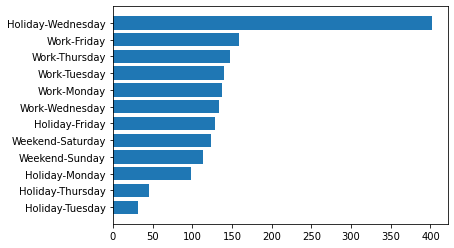

In [ ]:
m=df_hour.groupby('day_type')['cnt'].median().sort_values()
plt.barh(m.index,m)

In [ ]:
df_hour[df_hour['day_type']=='Holiday-Wednesday']

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,WC,day_type
instant,,,,,,,,,,,,,,
13076,2012-07-04,1,7,0,1,0,0.68,0.6364,0.79,0.0896,159,Fall,Clear,Holiday-Wednesday
13077,2012-07-04,1,7,1,1,0,0.68,0.6364,0.74,0.0000,123,Fall,Clear,Holiday-Wednesday
13078,2012-07-04,1,7,2,1,0,0.66,0.6061,0.83,0.1343,93,Fall,Clear,Holiday-Wednesday
13079,2012-07-04,1,7,3,1,0,0.68,0.6364,0.74,0.1940,32,Fall,Clear,Holiday-Wednesday
13080,2012-07-04,1,7,4,1,0,0.68,0.6364,0.69,0.2537,16,Fall,Clear,Holiday-Wednesday
13081,2012-07-04,1,7,5,1,0,0.66,0.6212,0.69,0.0000,19,Fall,Clear,Holiday-Wednesday
13082,2012-07-04,1,7,6,1,0,0.66,0.6212,0.69,0.0000,32,Fall,Clear,Holiday-Wednesday
13083,2012-07-04,1,7,7,1,0,0.68,0.6364,0.65,0.0000,72,Fall,Clear,Holiday-Wednesday
13084,2012-07-04,1,7,8,1,0,0.70,0.6515,0.61,0.1045,153,Fall,Clear,Holiday-Wednesday


NOTE: The bikes rented is significantly high for a Wednesday when it was a holiday.

In [ ]:
df_hour[['day', 'type']] = df_hour['day_type'].str.split('-', 2, expand=True)#Splitting the day_type variable into two columns

In [ ]:
df_hour.head()

,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_name,WC,day_type,day,type
instant,,,,,,,,,,,,,,,,
1,2011-01-01,0,1,0,0,0,0.24,0.2879,0.81,0.0,16,Spring,Clear,Weekend-Saturday,Weekend,Saturday
2,2011-01-01,0,1,1,0,0,0.22,0.2727,0.80,0.0,40,Spring,Clear,Weekend-Saturday,Weekend,Saturday
3,2011-01-01,0,1,2,0,0,0.22,0.2727,0.80,0.0,32,Spring,Clear,Weekend-Saturday,Weekend,Saturday
4,2011-01-01,0,1,3,0,0,0.24,0.2879,0.75,0.0,13,Spring,Clear,Weekend-Saturday,Weekend,Saturday
5,2011-01-01,0,1,4,0,0,0.24,0.2879,0.75,0.0,1,Spring,Clear,Weekend-Saturday,Weekend,Saturday


<BarContainer object of 3 artists>

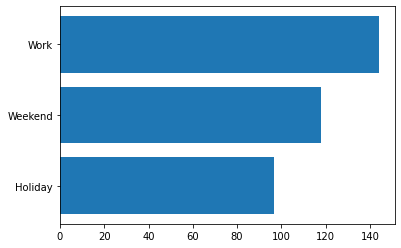

In [ ]:
d=df_hour.groupby('day')['cnt'].median().sort_values()
plt.barh(d.index,d)

NOTE: Maximum bikes are hired during the working days.

<BarContainer object of 7 artists>

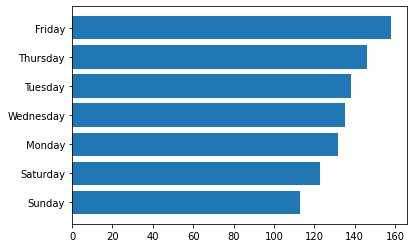

In [ ]:
d1=df_hour.groupby('type')['cnt'].median().sort_values()
plt.barh(d1.index,d1)

NOTE: Friday , Thursdays are the days when more bikes are hired than the rest of weekdays.

Summary: 
1. Season wise - Fall season has got the highest median 
2. Monthwise- May to October
3. Clear - max median hiring, heavy rain -min
4. Friday - median max hiring

We have dropped 'atemp' since there is high correlation with temp. Our target variable is 'cnt'. 

We have seen before that hum and windspeed have weak correlation with cnt but the correlation is significant indicating that there linear relationship is significant. Hence, we are not dropping those variables.

Hum and windspeed has weak negative correlation, thereofore, we are not dropping any of them.


In [ ]:
df_hour.drop(['dteday','holiday','workingday','atemp','day_type'],axis=1,inplace=True)
#We have created variables for weathersit - WC, season-seaon_name, holiday-day, workingday-type. Hence, those variables are dropped

In [ ]:
categorical_cols = df_hour.select_dtypes('object').columns.tolist()
categorical_cols

['season_name', 'WC', 'day', 'type']

In [ ]:
#One hot encoding is done on the data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df_hour[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_hour[encoded_cols] = encoder.transform(df_hour[categorical_cols])

In [ ]:
df_hour.head(2)

,yr,mnth,hr,temp,hum,windspeed,cnt,season_name,WC,day,...,day_Holiday,day_Weekend,day_Work,type_Friday,type_Monday,type_Saturday,type_Sunday,type_Thursday,type_Tuesday,type_Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0.24,0.81,0.0,16,Spring,Clear,Weekend,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1,1,0.22,0.80,0.0,40,Spring,Clear,Weekend,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_hour.drop(['season_name','WC','day','type'],axis=1,inplace=True)

MULTIVARIATE REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X=df_hour.drop('cnt',axis=1)
y=df_hour['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     449.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:48:33   Log-Likelihood:                -78606.
No. Observations:               12655   AIC:                         1.573e+05
Df Residuals:                   12635   BIC:                         1.574e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
yr                    55.1021      2

From the above regression, we can see that many features have insignificant p values and hence those variables are not affecting the prediction of our dependent variable cnt. Hence, they should be dropped.

In [ ]:
y_pred=est2.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

116.91140179649295


In [ ]:
df_hour.columns

Index(['yr', 'mnth', 'hr', 'temp', 'hum', 'windspeed', 'cnt',
       'season_name_Fall', 'season_name_Spring', 'season_name_Summer',
       'season_name_Winter', 'WC_Clear', 'WC_Heavy Rain', 'WC_Light Snow',
       'WC_Mist', 'day_Holiday', 'day_Weekend', 'day_Work', 'type_Friday',
       'type_Monday', 'type_Saturday', 'type_Sunday', 'type_Thursday',
       'type_Tuesday', 'type_Wednesday'],
      dtype='object')

In [ ]:
df_hour.drop(['WC_Clear', 'WC_Heavy Rain', 'WC_Light Snow',
       'WC_Mist', 'day_Holiday', 'day_Weekend', 'day_Work', 'type_Friday',
       'type_Monday', 'type_Saturday', 'type_Sunday', 'type_Thursday',
       'type_Tuesday', 'type_Wednesday','mnth','season_name_Summer'],axis=1,inplace=True)

In [ ]:
X=df_hour.drop('cnt',axis=1)
y=df_hour['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
#X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              4283.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):                        0.00
Time:                        13:48:57   Log-Likelihood:                         -78657.
No. Observations:               12655   AIC:                                  1.573e+05
Df Residuals:                   12647   BIC:                                  1.574e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

Coeffiecient of Determination is quite high in this case and we will keep this regression as our predicting model. All the features are significant as well. 

In [ ]:
y_pred=est2.predict(X_test)


rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(rmse_test)

117.36114926360447


RMSE value is slightly higher than the previous model, still this model would be better since we have all significant predictors with high R2 value.

# CONCLUSION:



This model would help any rental business to get an estimate of the number of bikes that would be rented based on the features like year, hour, temperature, season,etc. They would understand the hourly demand of bikes in a day and grow their business accordingly. 

The model used here is Multivariate Linear Regression which is able to predict the number of bikes that could be rented in an hourly basis.